# Практическая работа №8

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Задание 1

In [2]:
import pandas as pd

data = pd.DataFrame(
    data={
        'Улица': [80, 98, 75, 91, 78],
        'Гараж': [100, 82, 105, 89, 102],
    },
    index=[
        'Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница',
    ],
)

data

,Улица,Гараж
Понедельник,80,100
Вторник,98,82
Среда,75,105
Четверг,91,89
Пятница,78,102


In [3]:
print(
    "Коэффициент корреляции:",
    f"{data['Улица'].corr(data['Гараж'])}",
)

Коэффициент корреляции: -0.9999999999999998


# Задание 2

In [38]:
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


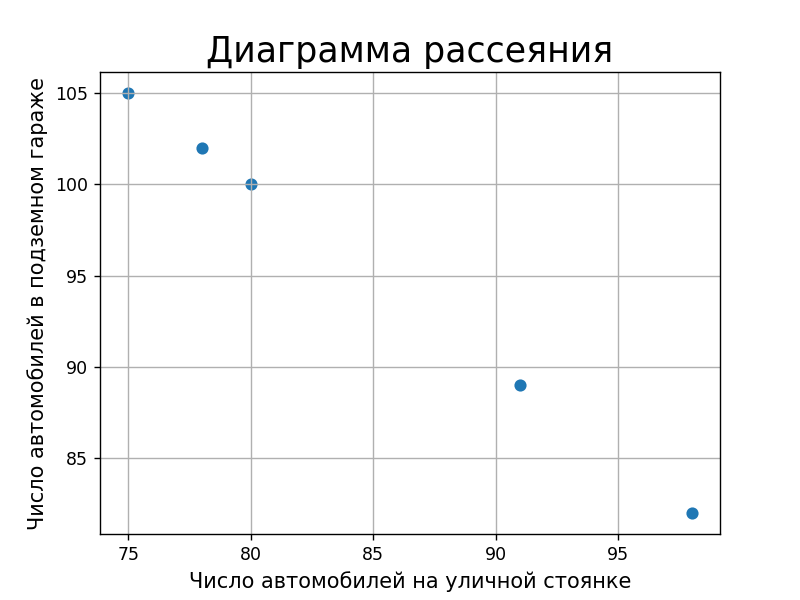

In [39]:
data_fig = plt.figure()

plt.grid(True)
plt.title('Диаграмма рассеяния', fontsize=20)
plt.xlabel('Число автомобилей на уличной стоянке', fontsize=12)
plt.ylabel('Число автомобилей в подземном гараже', fontsize=12)

plt.scatter(x=data['Улица'], y=data['Гараж'])
plt.show()

# Задание 3

In [40]:
bitcoin = pd.read_csv('bitcoin.csv')
bitcoin.drop(['Unnamed: 0'], axis=1, inplace=True)

print(f'Dataframe dimensions: {bitcoin.shape}')
bitcoin.head()

Dataframe dimensions: (2001, 7)


,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.60,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.10,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98


In [41]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        2001 non-null   object 
 1   high        2001 non-null   float64
 2   low         2001 non-null   float64
 3   open        2001 non-null   float64
 4   volumefrom  2001 non-null   float64
 5   volumeto    2001 non-null   float64
 6   close       2001 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.6+ KB


# Задание 4

In [42]:
import numpy as np

date_to_cost = pd.DataFrame(
    data={
        'high': bitcoin['high'],
        'predict': bitcoin['close'].shift(-14), # [:-14]
    }
)

date_to_cost.tail(20)

,high,predict
1981,38304.55,35798.57
1982,39945.35,33582.86
1983,39842.90,33409.38
1984,40854.81,37391.58
1985,40408.95,36680.78
1986,38879.60,36843.33
1987,37307.10,NaN
1988,36481.62,NaN
1989,37512.80,NaN
1990,37910.19,NaN


In [43]:
date_to_cost.dtypes

high       float64
predict    float64
dtype: object

In [44]:
date_to_cost.corr().style.background_gradient(cmap='coolwarm')

,high,predict
high,1.000000,0.973826
predict,0.973826,1.000000


# Задание 5

In [45]:
from sklearn.linear_model import LinearRegression

X = np.array(date_to_cost['high']).reshape(-1, 1)
y = np.array(date_to_cost['predict'])

regression_btc = LinearRegression().fit(X[:-14], y[:-14])

In [46]:
prediction_btc = regression_btc.predict(X).flatten()
prediction_btc

array([  828.85493461,   812.36599182,   810.14448501, ...,
       36320.93085599, 37143.25224349, 36452.52640815])

In [47]:
prediction_btc = pd.DataFrame(
    data={
        'Предсказанная (от high) стоимость Bitcoin, $': prediction_btc[-14:],
        'Реально зафиксированная стоимость Bitcoin, $': bitcoin['close'][-14:],
    },
)
prediction_btc.index = bitcoin['high'][-14:]
prediction_btc.index.names = ['Дата']

prediction_btc

,"Предсказанная (от high) стоимость Bitcoin, $","Реально зафиксированная стоимость Bitcoin, $"
Дата,,
37307.10,36109.006767,34611.58
36481.62,35318.571662,35662.59
37512.80,36305.973987,37290.83
37910.19,36686.493207,36683.51
38225.18,36988.110634,37576.98
39482.46,38192.014118,39229.66
39273.49,37991.915723,36861.50
37911.76,36687.996555,35538.40
36453.81,35291.942307,35798.57


# Задание 6

In [48]:
print(
    f"Наклон линии регрессии: {regression_btc.coef_[0]}",
    f"Y-перехват: {regression_btc.intercept_}",
    sep='\n',
)

Наклон линии регрессии: 0.9575460391470993
Y-перехват: 385.7409295389625


# Задание 7

<IPython.core.display.Javascript object>


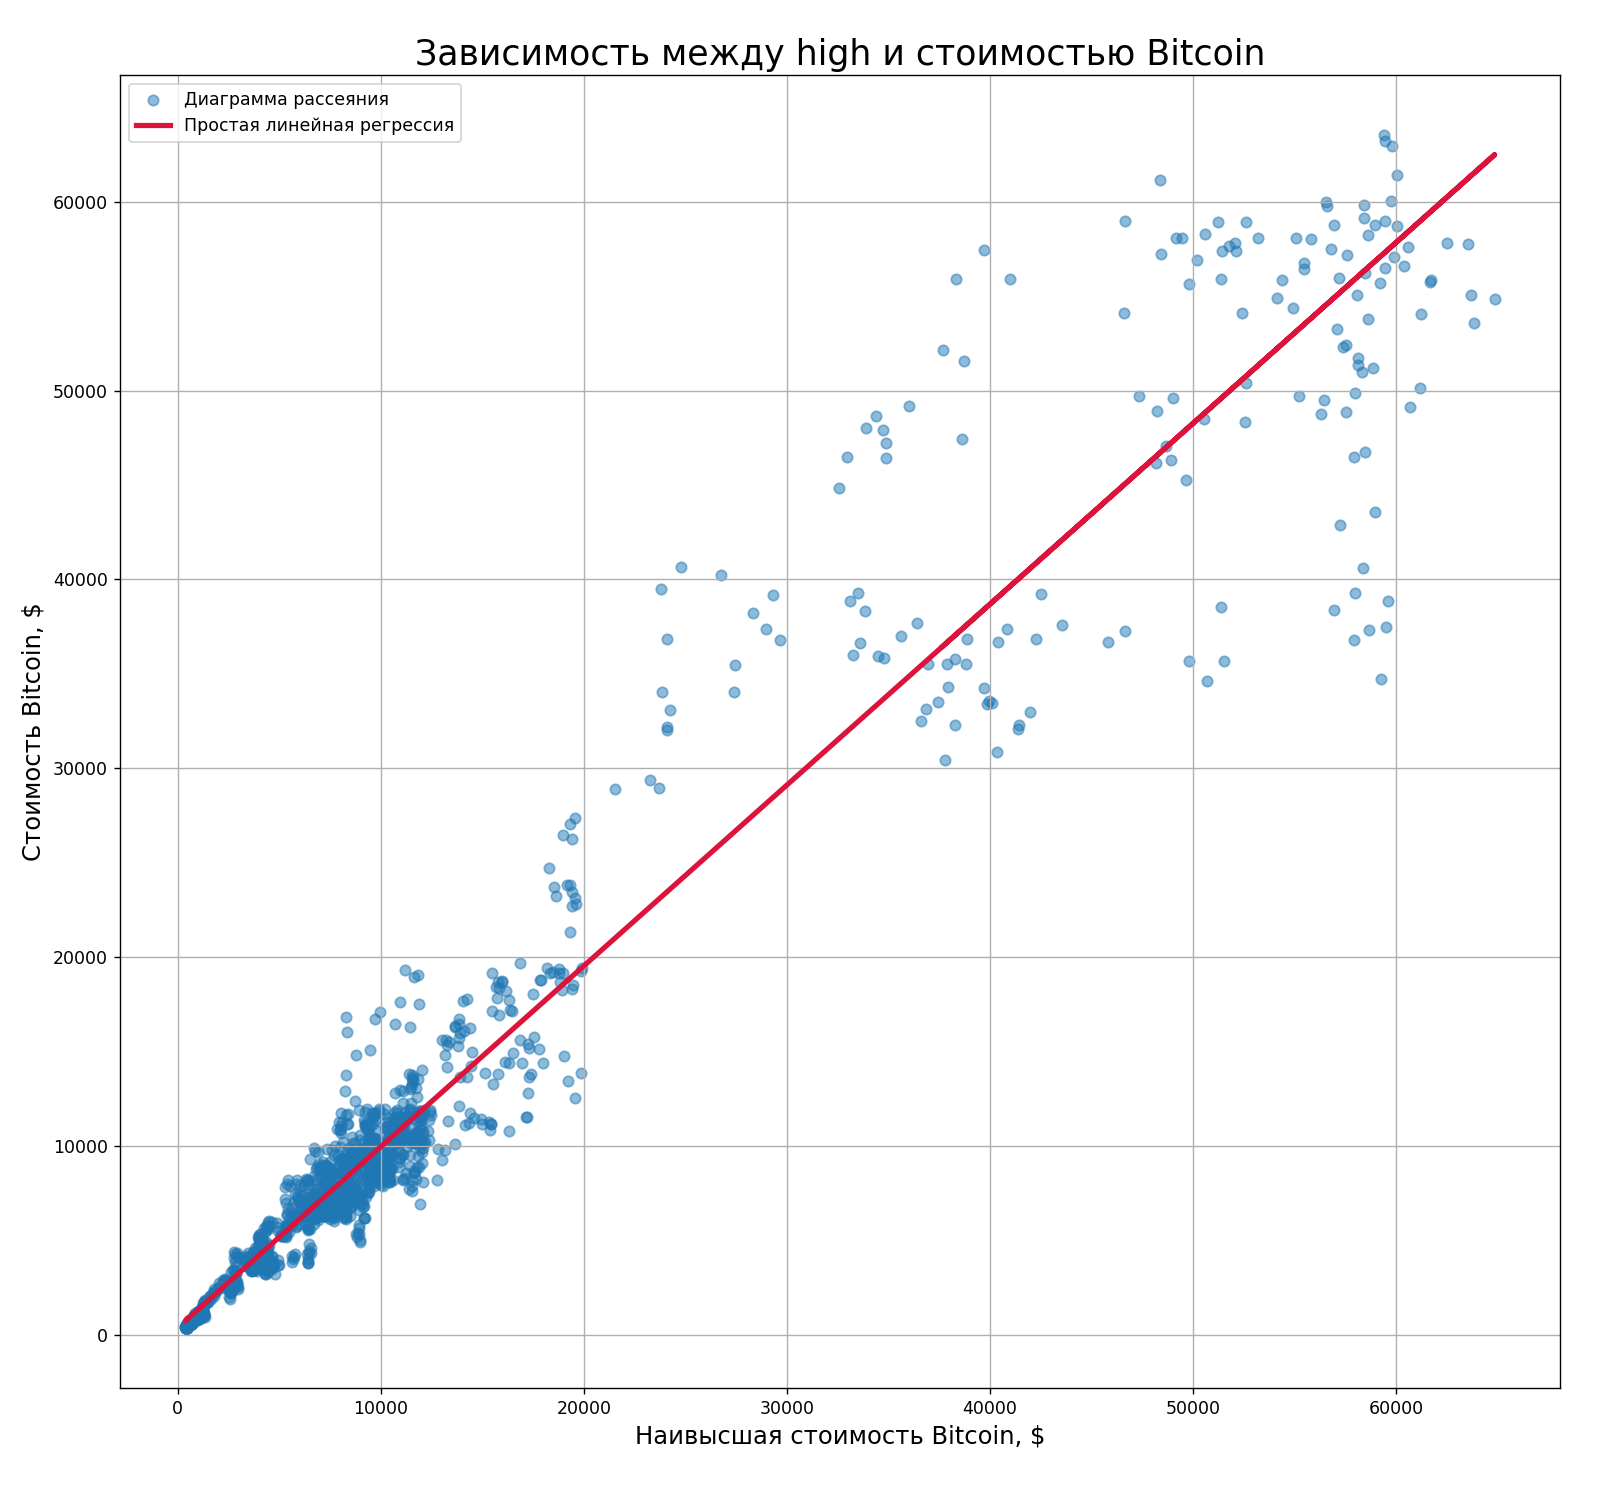

In [50]:
bitcoin_fig, ax = plt.subplots(figsize=(12.8, 12))
bitcoin_fig.subplots_adjust(0.075, 0.075, 0.975, 0.95)

plt.title('Зависимость между high и стоимостью Bitcoin', fontsize=20)

plt.scatter(
    x=date_to_cost['high'], y=date_to_cost['predict'],
    alpha=0.5, label='Диаграмма рассеяния',
)
plt.plot(
    X, regression_btc.predict(X),
    color='crimson', linewidth=3,
    label='Простая линейная регрессия',
)

plt.xlabel('Наивысшая стоимость Bitcoin, $', fontsize=14)
plt.ylabel('Стоимость Bitcoin, $', fontsize=14)

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

# Задание 8

In [21]:
price = pd.read_csv('housePrice.csv', thousands=',')

print(f'Dataframe dimensions: {price.shape}')
price.head()

Dataframe dimensions: (3479, 8)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [22]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   int64  
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 146.2+ KB


In [23]:
price.describe()

,Area,Room,Price,Price(USD)
count,3.479000e+03,3479.000000,3.479000e+03,3.479000e+03
mean,8.744000e+06,2.079908,5.359023e+09,1.786341e+05
std,3.167266e+08,0.758275,8.099935e+09,2.699978e+05
min,3.000000e+01,0.000000,3.600000e+06,1.200000e+02
25%,6.900000e+01,2.000000,1.418250e+09,4.727500e+04
50%,9.000000e+01,2.000000,2.900000e+09,9.666667e+04
75%,1.200000e+02,2.000000,6.000000e+09,2.000000e+05
max,1.616000e+10,5.000000,9.240000e+10,3.080000e+06


# Задание 9

In [24]:
quantile = price['Area'].quantile(.99)

price = price[price['Area'] < quantile]

In [25]:
price.describe()

,Area,Room,Price,Price(USD)
count,3444.000000,3444.000000,3.444000e+03,3.444000e+03
mean,102.653020,2.068525,5.124715e+09,1.708238e+05
std,51.376075,0.740871,7.100481e+09,2.366827e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,68.000000,2.000000,1.400000e+09,4.666667e+04
50%,90.000000,2.000000,2.850000e+09,9.500000e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,405.000000,5.000000,8.500000e+10,2.833333e+06


In [26]:
price.corr().style.background_gradient(cmap='coolwarm')

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.788524,0.256229,0.122530,0.182814,0.797784,0.797784
Room,0.788524,1.000000,0.274778,0.128165,0.207735,0.570775,0.570775
Parking,0.256229,0.274778,1.000000,0.428808,0.437644,0.213059,0.213059
Warehouse,0.122530,0.128165,0.428808,1.000000,0.199383,0.126712,0.126712
Elevator,0.182814,0.207735,0.437644,0.199383,1.000000,0.162221,0.162221
Price,0.797784,0.570775,0.213059,0.126712,0.162221,1.000000,1.000000
Price(USD),0.797784,0.570775,0.213059,0.126712,0.162221,1.000000,1.000000


In [27]:
price.drop(['Price'], axis=1, inplace=True)

price.corr().style.background_gradient(cmap='coolwarm')

,Area,Room,Parking,Warehouse,Elevator,Price(USD)
Area,1.000000,0.788524,0.256229,0.122530,0.182814,0.797784
Room,0.788524,1.000000,0.274778,0.128165,0.207735,0.570775
Parking,0.256229,0.274778,1.000000,0.428808,0.437644,0.213059
Warehouse,0.122530,0.128165,0.428808,1.000000,0.199383,0.126712
Elevator,0.182814,0.207735,0.437644,0.199383,1.000000,0.162221
Price(USD),0.797784,0.570775,0.213059,0.126712,0.162221,1.000000


# Задание 10

In [28]:
X, y = price['Area'], price['Price(USD)']

n = np.size(X)
m_X, m_y = np.mean(X), np.mean(y)

SS_Xy = np.sum(y * X) - n * (m_y * m_X)
SS_XX = np.sum(X * X) - n * (m_X * m_X)

# Задание 11

In [29]:
coef_price = SS_Xy / SS_XX
intercept_price = m_y - (coef_price * m_X)

print(
    f"Наклон линии регрессии: {coef_price}",
    f"Y-перехват: {intercept_price}",
    sep='\n',
)

Наклон линии регрессии: 3675.282602461848
Y-перехват: -206455.00915985904


In [30]:
np_X = np.array(X).reshape(-1, 1)

regression_price = LinearRegression().fit(np_X, y)
prediction_price = regression_price.predict(np_X).flatten()

print(
    f"Наклон линии регрессии: {regression_price.coef_[0]}",
    f"Y-перехват: {regression_price.intercept_}",
    sep='\n',
)

Наклон линии регрессии: 3675.2826024618457
Y-перехват: -206455.0091598588


# Задание 12

In [31]:
price_fig, bx = plt.subplots(figsize=(12.8, 12))
price_fig.subplots_adjust(0.075, 0.075, 0.975, 0.95)

plt.title('Зависимость между площадью и стоимостью дома', fontsize=20)

plt.scatter(
    x=X, y=y,
    alpha=0.5, label='Диаграмма рассеяния',
)
plt.plot(
    X, intercept_price + (coef_price * X),
    color='crimson', linewidth=3,
    label='Простая линейная регрессия',
)

plt.xlabel('Площадь дома', fontsize=14)
plt.ylabel('Стоимость дома, $', fontsize=14)

plt.grid(True)
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>